<a href="https://colab.research.google.com/github/amannan21/aj/blob/main/tiger_or_lion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [8]:
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.5 MB/s eta 0:00:00


In [3]:
from fastcore.all import *
import time

def search_images(term, max_images=100):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [4]:
urls = search_images('royal bengal tiger', max_images=5)
urls[0]

'https://c8.alamy.com/comp/G24G99/royal-bengal-tiger-named-ustaad-from-ranthambore-tiger-reserve-strolling-G24G99.jpg'

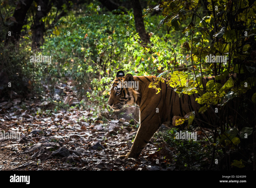

In [5]:
from fastdownload import download_url
dest = 'tiger.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

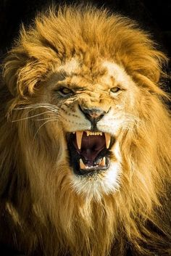

In [6]:
download_url(search_images('a lion', max_images=1)[0], 'lion.jpg', show_progress=False)
Image.open('lion.jpg').to_thumb(256,256)

In [7]:
searches = 'photo of a lion','photo of a tiger'
path = Path('tiger_lion')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=300, dest=path/o)

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

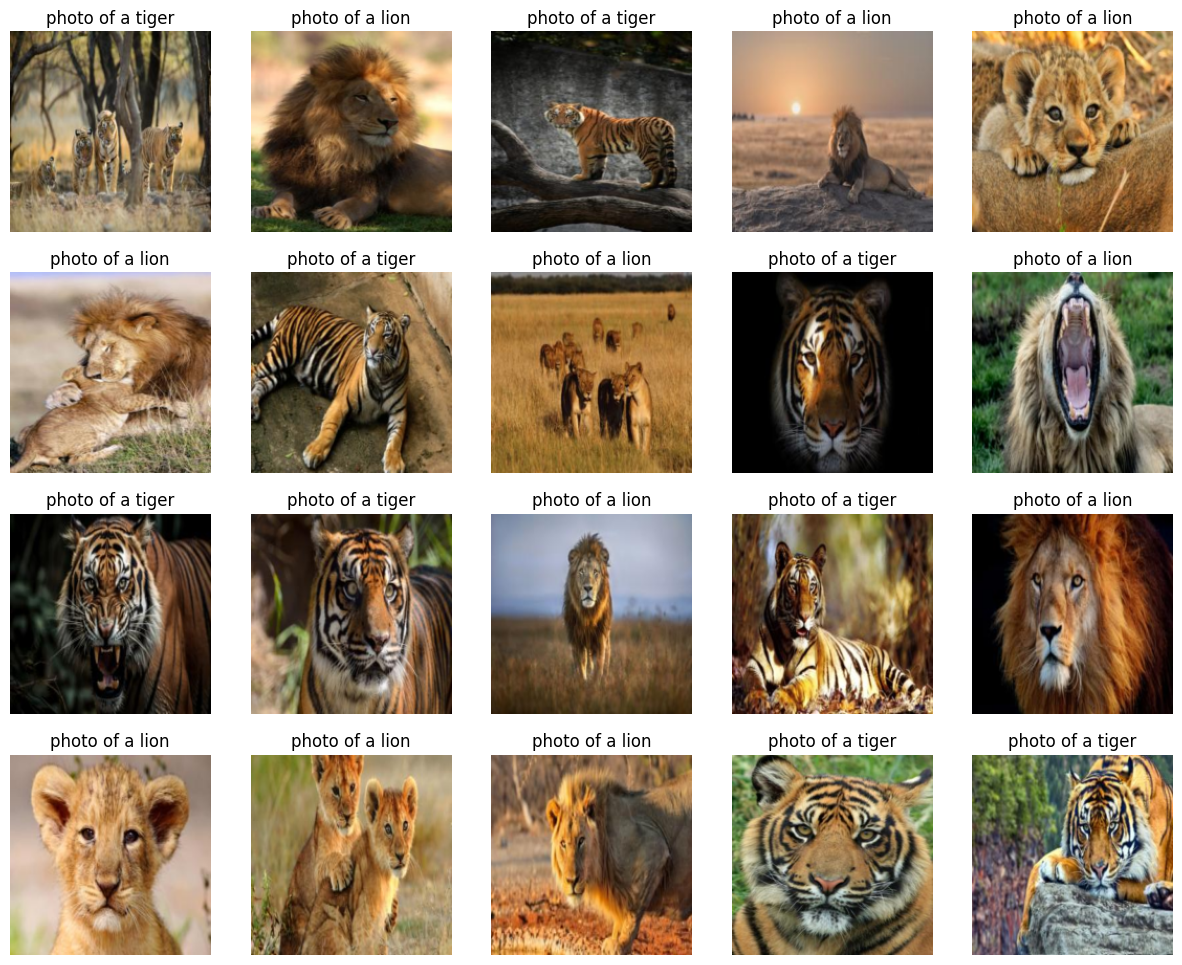

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=20)

In [13]:
from fastai.vision.all import vision_learner


learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.486529,0.996722,0.361111,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.498802,0.267423,0.083333,00:00
1,0.355915,0.103734,0.027778,00:00
2,0.254161,0.053964,0.027778,00:00
3,0.191653,0.025179,0.027778,00:00
4,0.152260,0.010609,0.000000,00:00
5,0.124683,0.005655,0.000000,00:01
6,0.104930,0.003815,0.000000,00:01
7,0.089924,0.002867,0.000000,00:01
8,0.078259,0.002224,0.000000,00:00
9,0.068949,0.002156,0.000000,00:00


# Check to see if our model actually worked


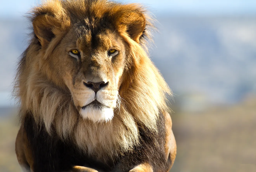

In [14]:
download_url(search_images('a lion', max_images=1)[0], 'lion.jpg', show_progress=False)
Image.open('lion.jpg').to_thumb(256,256)

In [15]:
is_normal,_,probs = learn.predict(PILImage.create('lion.jpg'))
print(f"This is a: {is_normal}.")
print(f"Probability it's a Lion: {probs[0]:.4f}")

This is a: photo of a lion.
Probability it's a Lion: 1.0000
